In [212]:
#import the necessary libraries 
import pandas as pd #data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt #data plot
%matplotlib inline 
import seaborn as sns #data plot
import warnings
warnings.filterwarnings("ignore") #ignore warning

In [213]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [214]:
# load and read the dataset
loan_train = pd.read_csv("loan-train.csv")
loan_test = pd.read_csv("loan-test.csv")

In [215]:
#Lets display the some few information from our large datasets
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [216]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [217]:
#Check the size of train/test dataset
print("The size of train dataset is: ", loan_train.shape)
print("The size of test dataset is: ", loan_test.shape)

The size of train dataset is:  (614, 13)
The size of test dataset is:  (367, 12)


In [218]:
# check the data types of variable in the dataset. 
loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [219]:
loan_train.drop(['Loan_ID'],axis=1,inplace=True) # Delete Loan_ID from training dataset 

In [220]:
loan_train.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [221]:
loan_test.isna().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [222]:
#Fill nan values of categorical variables. 
loan_train["Gender"].fillna(loan_train["Gender"].mode()[0], inplace=True)
loan_test["Gender"].fillna(loan_test["Gender"].mode()[0], inplace=True)
loan_train["Married"].fillna(loan_train["Married"].mode()[0], inplace=True)
loan_train["Dependents"].fillna(loan_train["Dependents"].mode()[0], inplace=True)
loan_test["Dependents"].fillna(loan_test["Dependents"].mode()[0], inplace=True)
loan_train["Self_Employed"].fillna(loan_train["Self_Employed"].mode()[0], inplace=True)
loan_test["Self_Employed"].fillna(loan_test["Self_Employed"].mode()[0], inplace=True)
loan_train["Credit_History"].fillna(loan_train["Credit_History"].mode()[0], inplace=True)
loan_test["Credit_History"].fillna(loan_test["Credit_History"].mode()[0], inplace=True)

In [223]:
#Fill nan values of numeric variables. 
loan_train["LoanAmount"].fillna(loan_train["LoanAmount"].median(), inplace=True)
loan_test["LoanAmount"].fillna(loan_test["LoanAmount"].median(), inplace=True)
loan_train["Loan_Amount_Term"].fillna(loan_train["Loan_Amount_Term"].median(), inplace=True)
loan_test["Loan_Amount_Term"].fillna(loan_test["Loan_Amount_Term"].median(), inplace=True)

In [224]:
#let's check null values again
loan_train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [225]:
loan_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [226]:
loan_train.describe(include="all")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,145.752443,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.107233,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


In [228]:
loan_test.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,367,367,367,367,367,367.000000,367.000000,367.000000,367.000000,367.000000,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP001015,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,1,297,233,210,283,330,NaN,NaN,NaN,NaN,NaN,140
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,135.980926,342.822888,0.839237,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,60.959739,64.658402,0.367814,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,101.000000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,157.500000,360.000000,1.000000,NaN


In [229]:
loan_train["Total Income"]= loan_train["ApplicantIncome"] + loan_train["CoapplicantIncome"]
loan_test["Total Income"]= loan_test["ApplicantIncome"] + loan_test["CoapplicantIncome"]
loan_train["Total Income"].head()

0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
Name: Total Income, dtype: float64

In [230]:
loan_train["Loan Status"] = loan_train["Loan_Status"].replace({"Y": 1, "N": 0})
loan_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income,Loan Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,1


In [231]:
loan_train["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

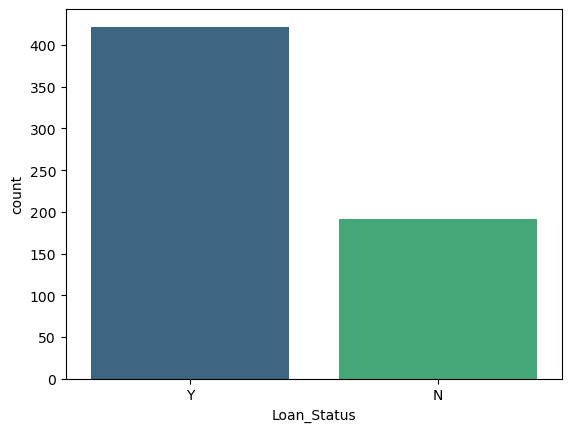

In [232]:
sns.countplot(x="Loan_Status", data=loan_train, palette="viridis")
plt.show()

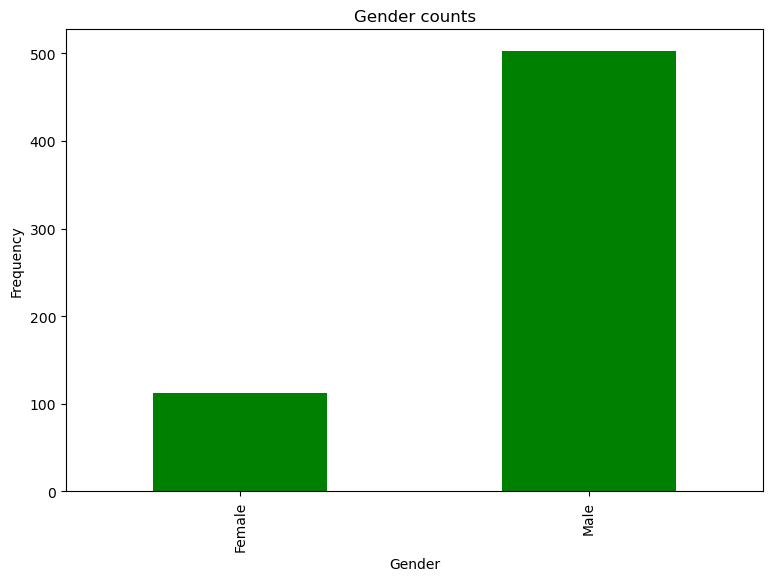

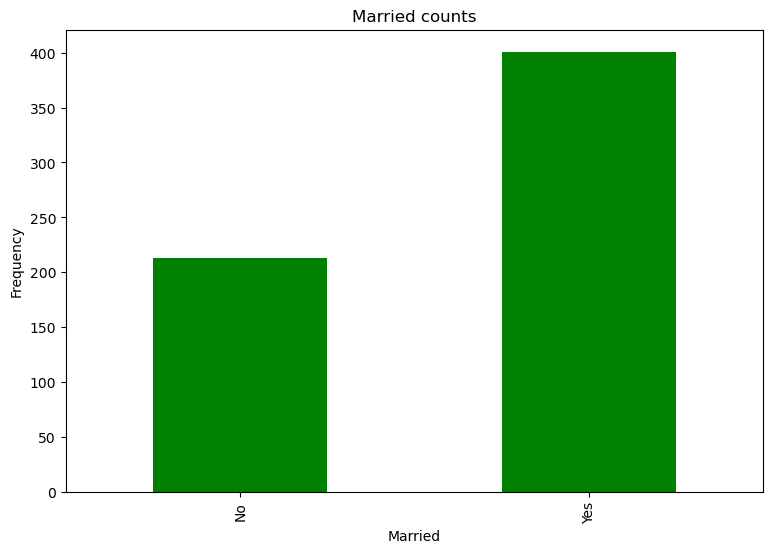

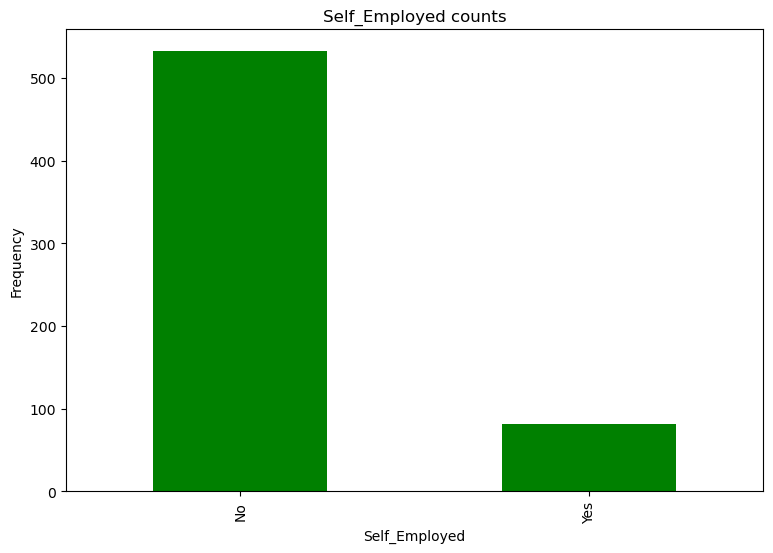

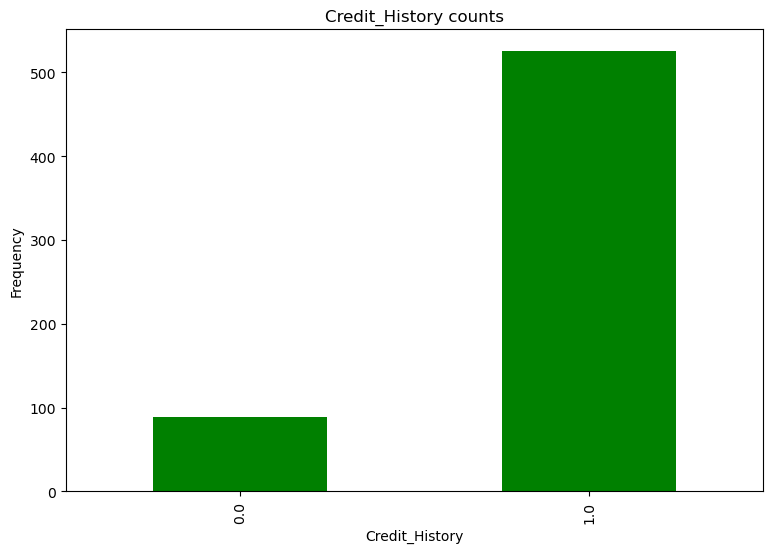

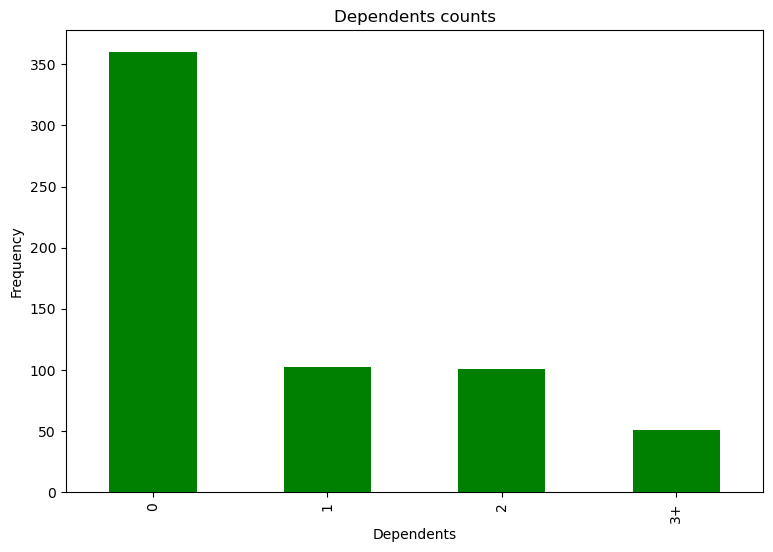

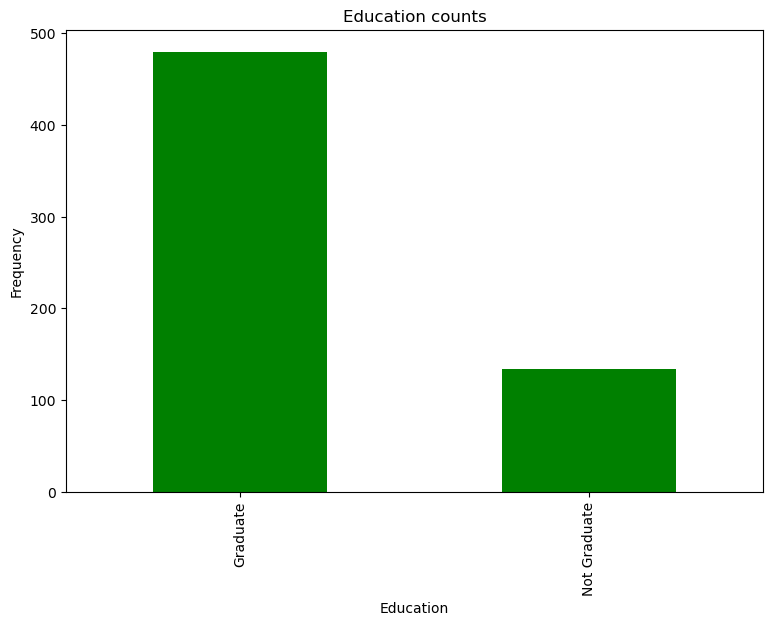

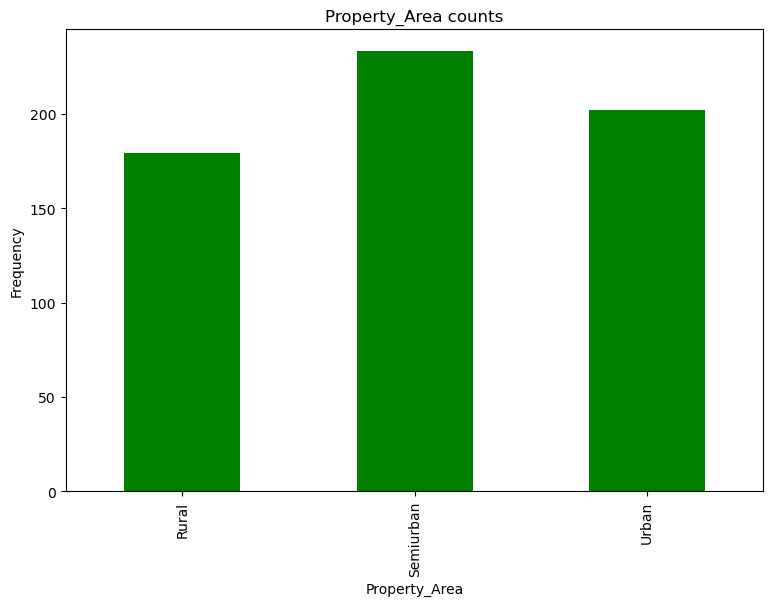

In [246]:
categorical_features = loan_train[["Gender", "Married", "Self_Employed", "Credit_History", "Dependents", "Education", "Property_Area"]]
#plot a bar chart for each categorical feature
for col in categorical_features:
    fig=plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = loan_train[col]
    counts = loan_train[col].value_counts().sort_index()
    counts.plot.bar(ax = ax, color="green")
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

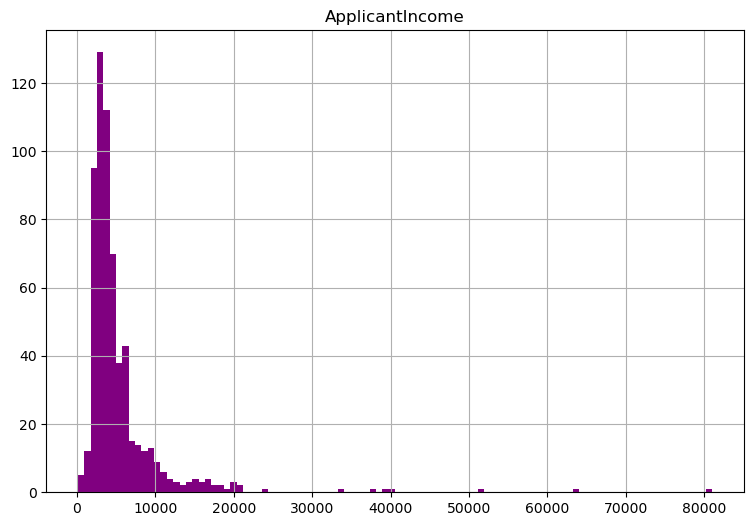

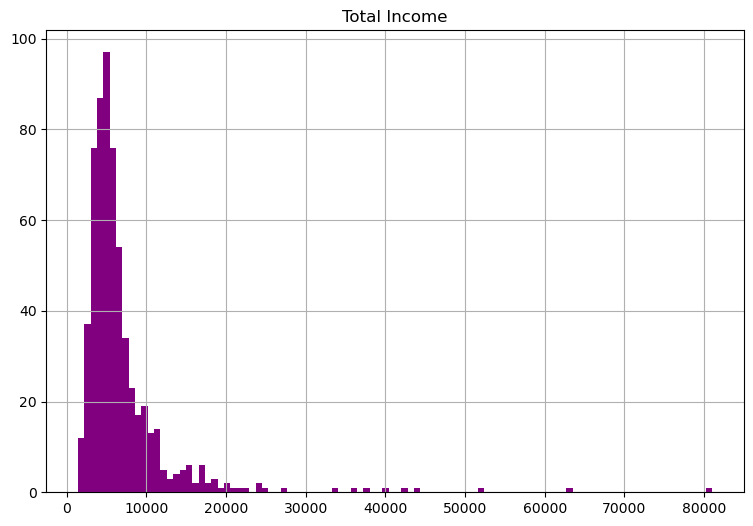

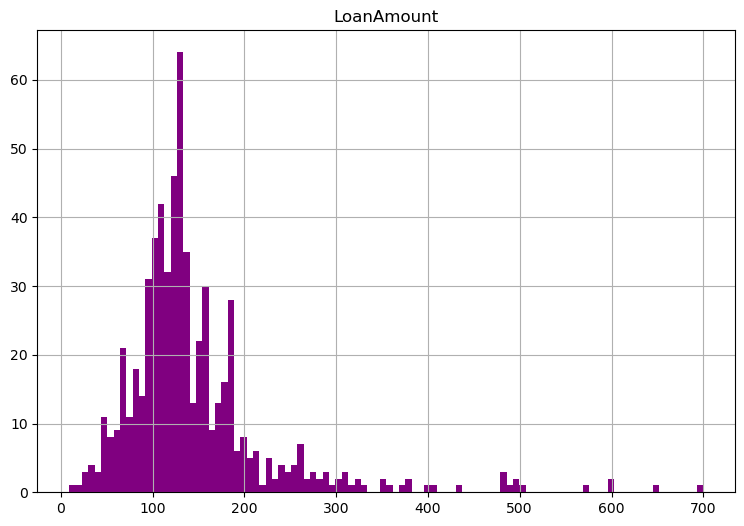

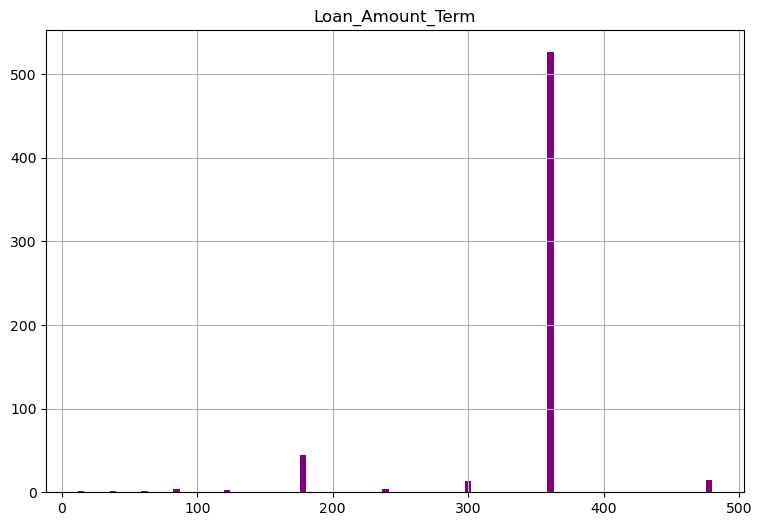

In [247]:
numeric_features = loan_train[["ApplicantIncome", "Total Income", "LoanAmount", "Loan_Amount_Term"]]

# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = loan_train[col]
    feature.hist(bins=100, ax = ax, color="purple")
    ax.set_title(col)
plt.show()

Axes(0.125,0.11;0.775x0.77)


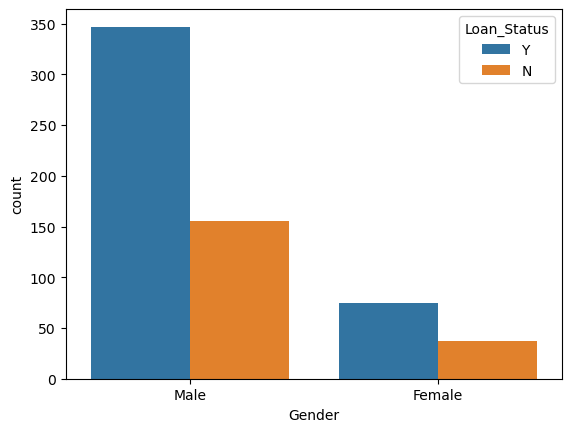

Axes(0.125,0.11;0.775x0.77)


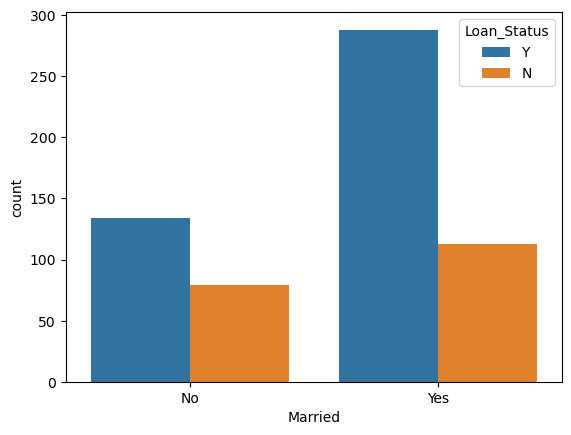

Axes(0.125,0.11;0.775x0.77)


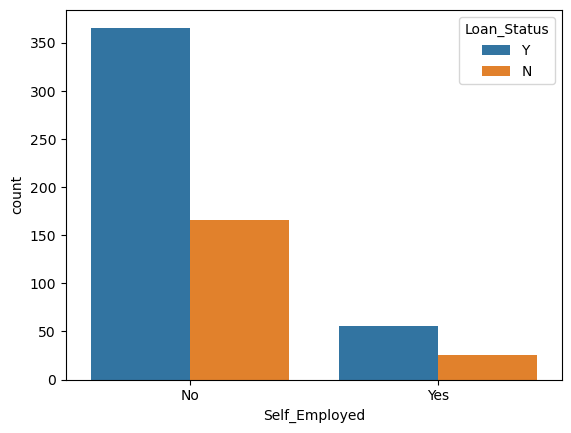

Axes(0.125,0.11;0.775x0.77)


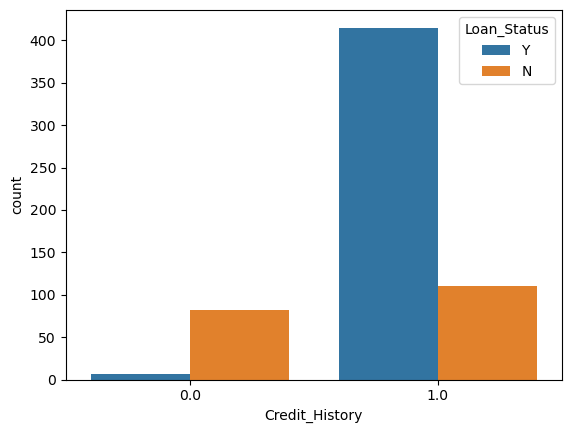

Axes(0.125,0.11;0.775x0.77)


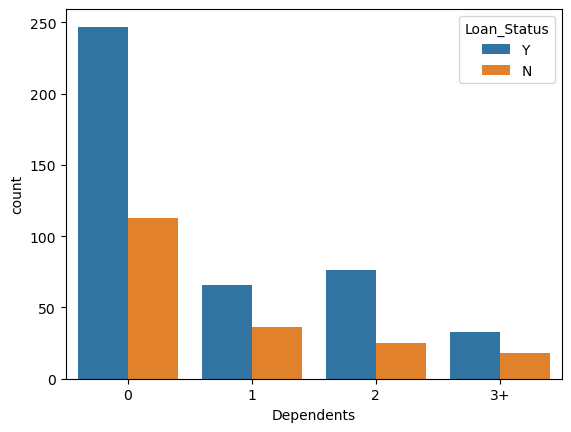

Axes(0.125,0.11;0.775x0.77)


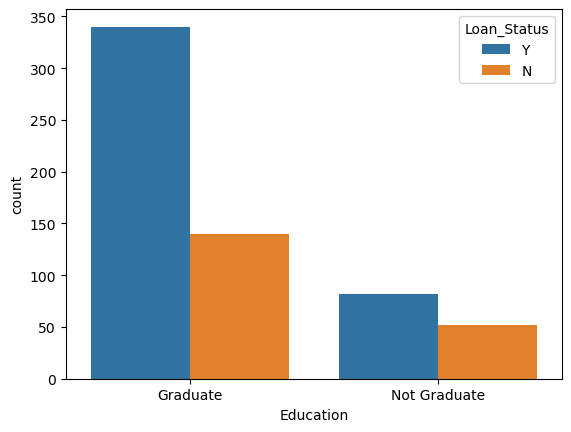

Axes(0.125,0.11;0.775x0.77)


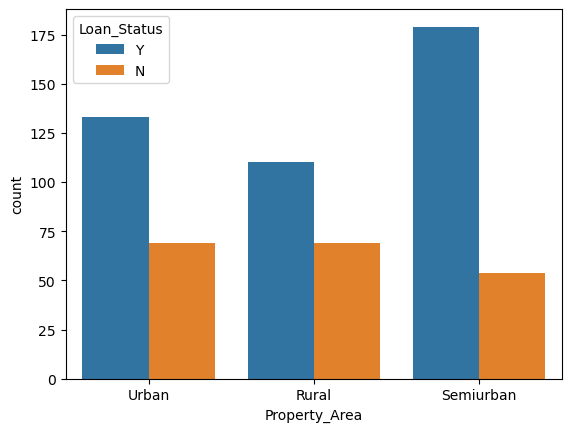

In [248]:
for feature in categorical_features:
    print(sns.countplot(x=feature, data=loan_train, hue='Loan_Status'))
    plt.show()

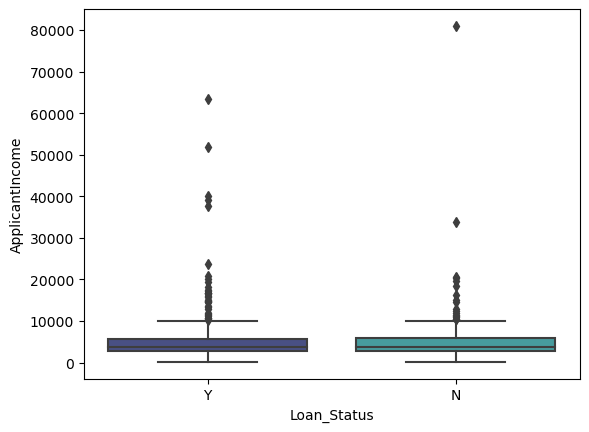

In [249]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=loan_train, palette="mako");

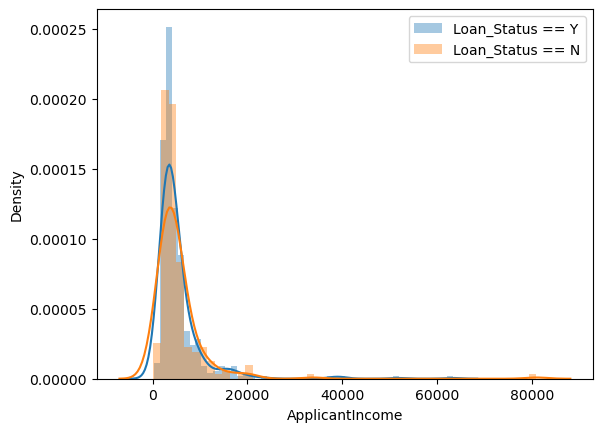

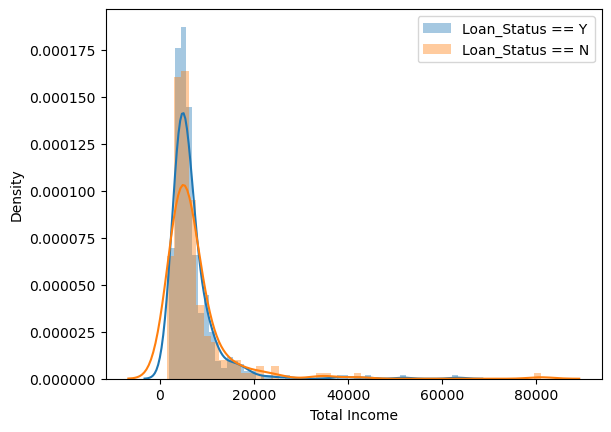

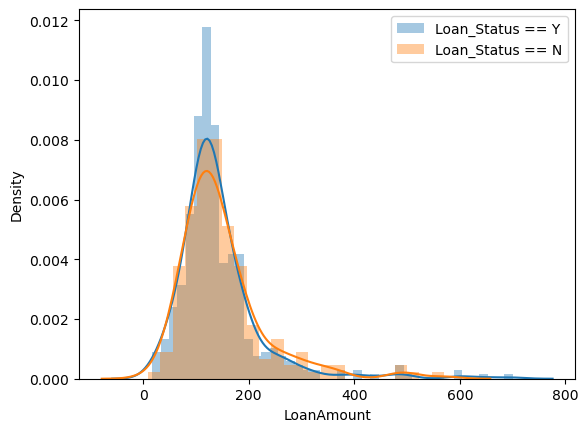

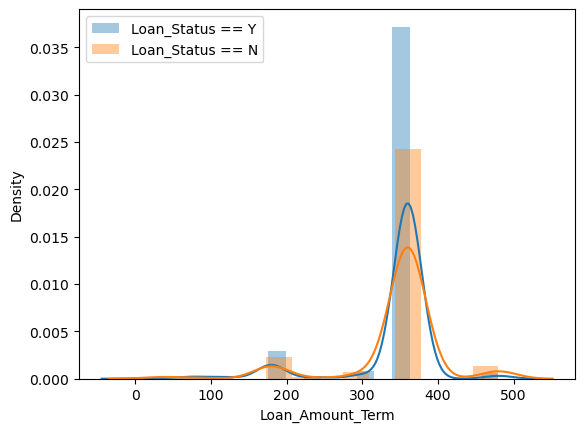

In [250]:
df_approved = loan_train[loan_train['Loan_Status'] == 'Y']
df_rejected = loan_train[loan_train['Loan_Status'] == 'N']


for feature in numeric_features:
    sns.distplot(df_approved[feature][df_approved[feature].isna() == False], label = 'Loan_Status == Y')
    sns.distplot(df_rejected[feature][df_rejected[feature].isna() == False], label = 'Loan_Status == N')
    plt.legend()
    plt.show()

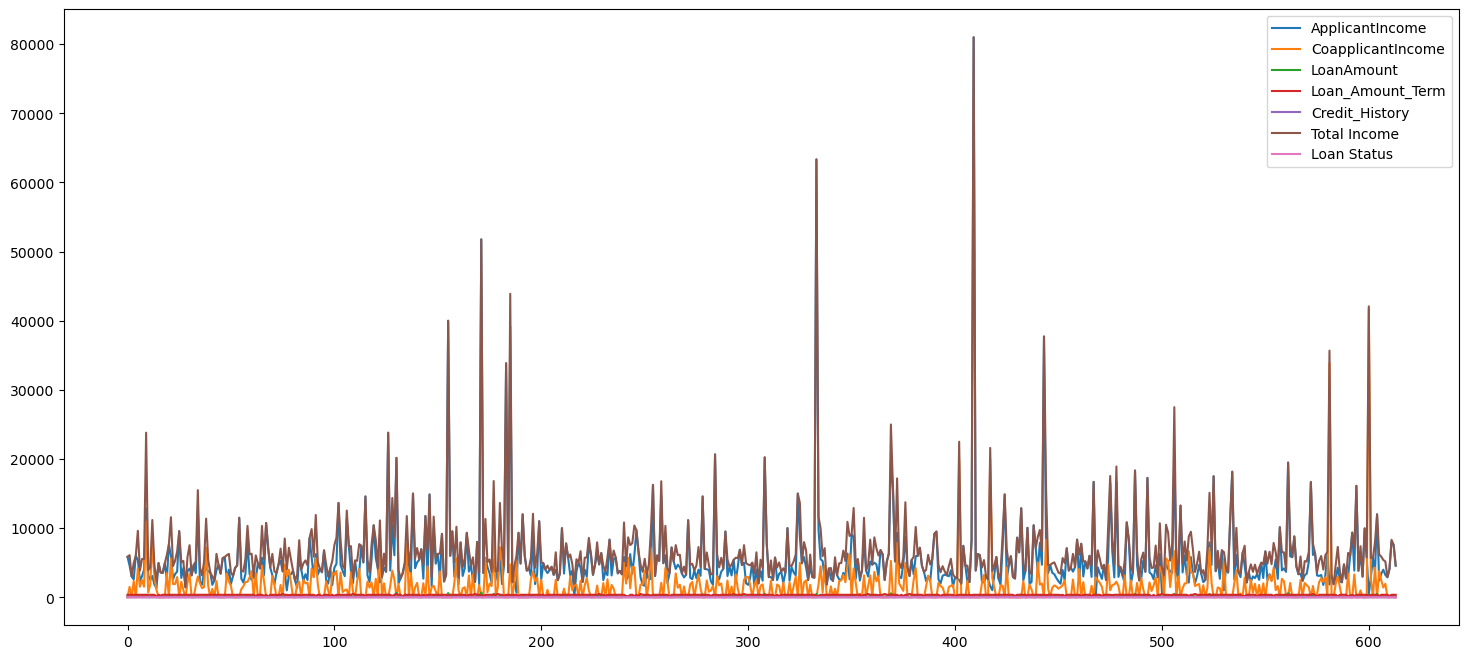

In [251]:
loan_train.plot(figsize=(18, 8))

plt.show()

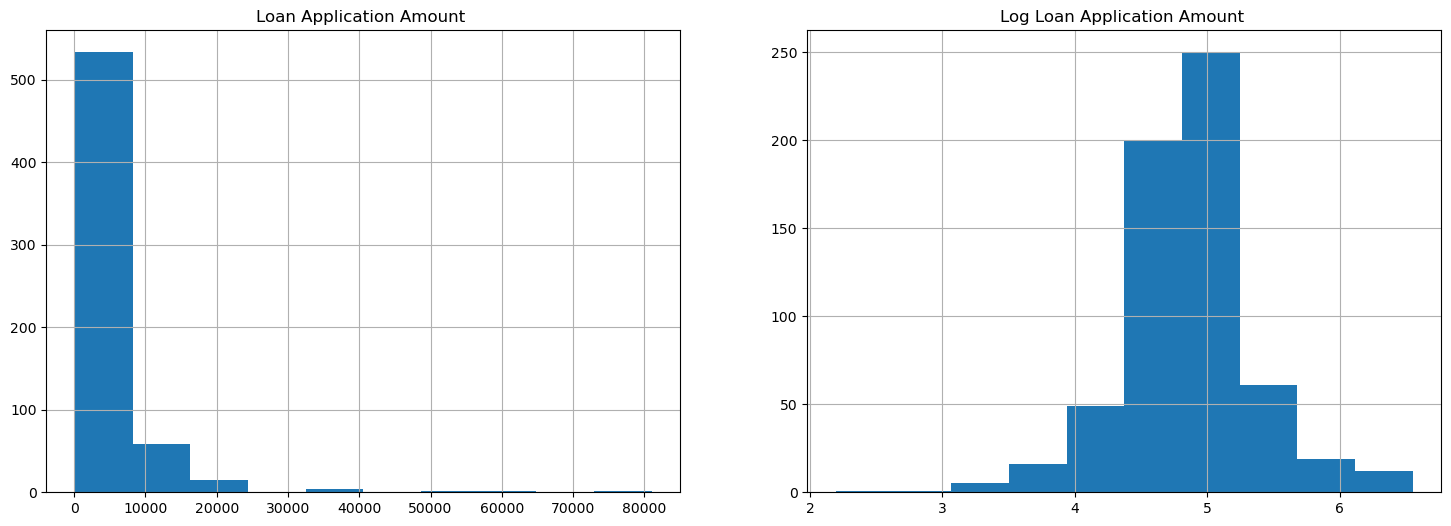

In [252]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


loan_train['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(loan_train['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

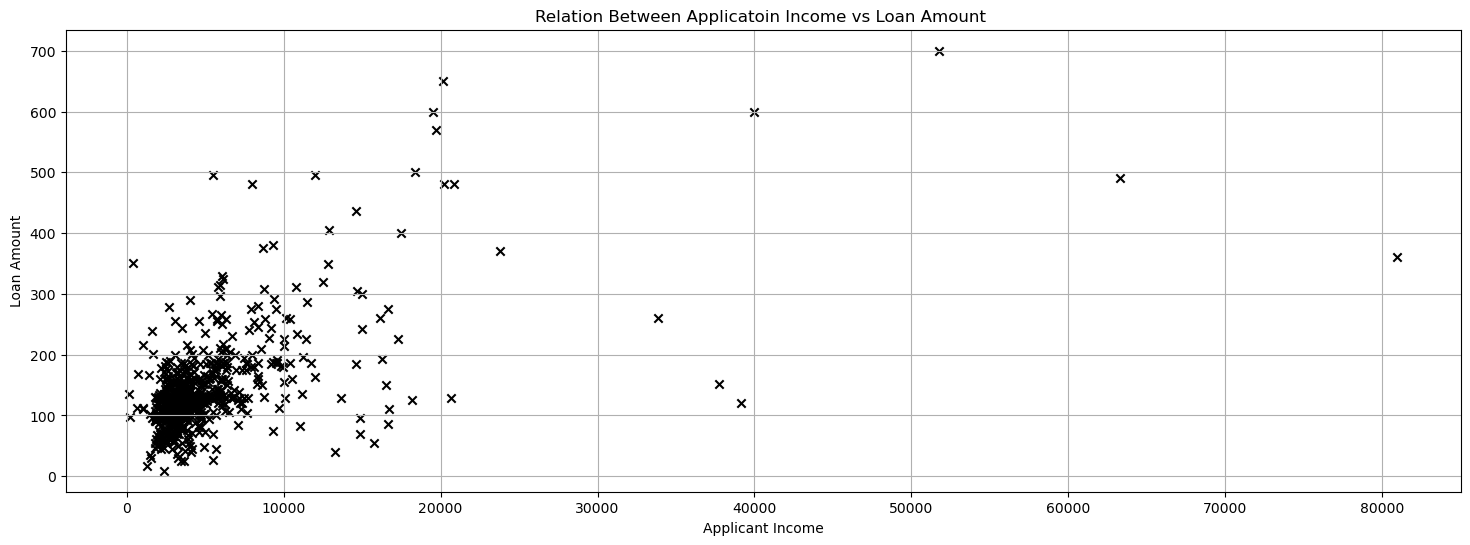

In [253]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(loan_train['ApplicantIncome'] , loan_train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

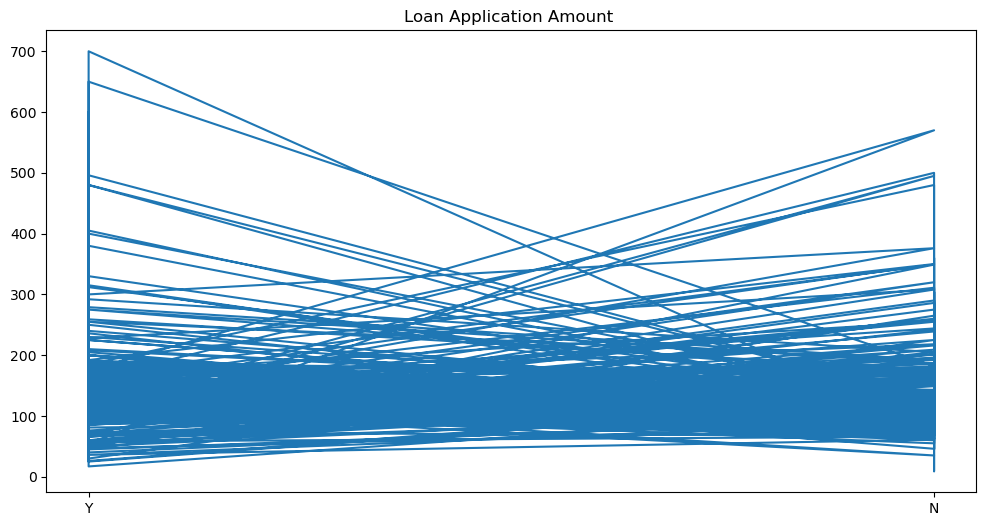

In [254]:
plt.figure(figsize=(12, 6))
plt.plot(loan_train['Loan_Status'], loan_train['LoanAmount'])
plt.title("Loan Application Amount ")
plt.show()

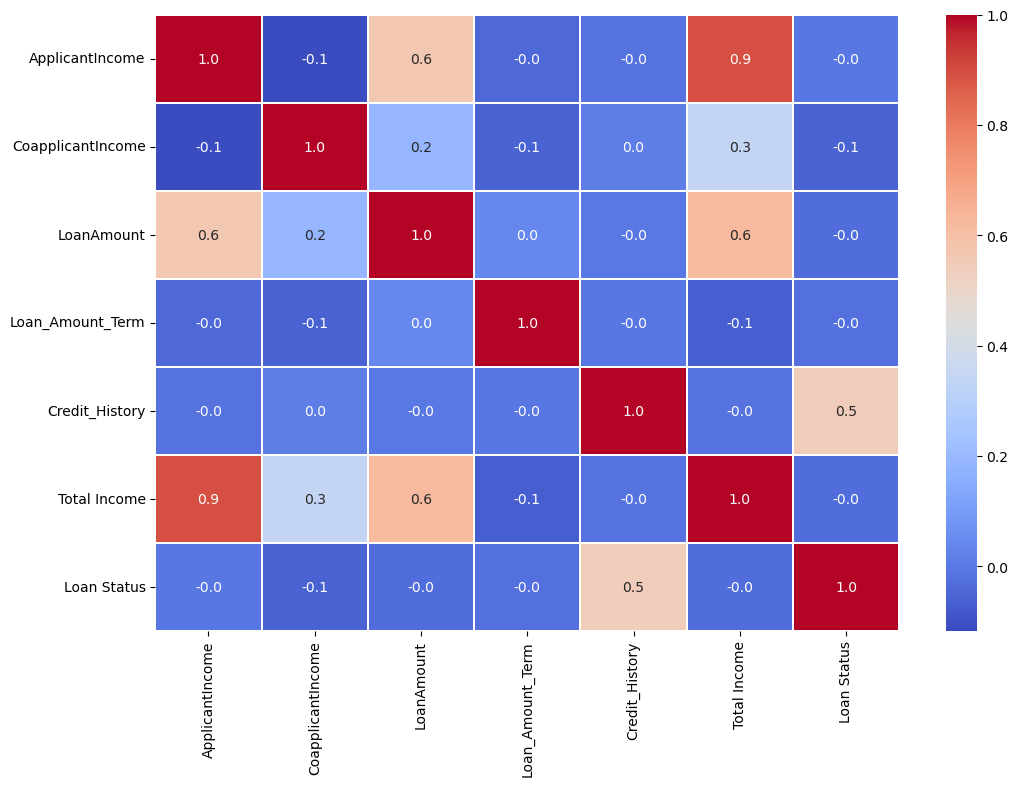

In [255]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [256]:
#Label encoding for train dataset
from sklearn.preprocessing import LabelEncoder
ordinal_category= ['Dependents','Property_Area'] 
encoder= LabelEncoder()
for i in ordinal_category:  
    loan_train[i] = encoder.fit_transform(loan_train[i]) 
loan_train.dtypes

Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status           object
Total Income         float64
Loan Status            int64
dtype: object

In [257]:
#Label encoding for train dataset
from sklearn.preprocessing import LabelEncoder
ordinal_category= ['Dependents','Property_Area'] 
encoder= LabelEncoder()
for i in ordinal_category:  
    loan_test[i] = encoder.fit_transform(loan_test[i]) 
loan_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Total Income           int64
dtype: object

In [258]:
#One hot encoding using get_dummies() for training dataset
nominal_category = ['Gender', 'Married', 'Education', 'Self_Employed']
for a in nominal_category:
    dummies = pd.get_dummies(loan_train[a], prefix=a)
    loan_train = pd.concat([loan_train.drop(a, axis=1), dummies], axis=1)

loan_train['Loan_Status'] = encoder.fit_transform(loan_train['Loan_Status'])

In [259]:
print(loan_train.columns)

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total Income', 'Loan Status', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes'],
      dtype='object')


In [260]:
loan_train.dtypes

Dependents                  int32
ApplicantIncome             int64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term          float64
Credit_History            float64
Property_Area               int32
Loan_Status                 int32
Total Income              float64
Loan Status                 int64
Gender_Female               uint8
Gender_Male                 uint8
Married_No                  uint8
Married_Yes                 uint8
Education_Graduate          uint8
Education_Not Graduate      uint8
Self_Employed_No            uint8
Self_Employed_Yes           uint8
dtype: object

In [261]:
nominal_category = ['Gender', 'Married', 'Education', 'Self_Employed']
for i in nominal_category:
    if loan_test[i].nunique() == 2:
        loan_test[i] = pd.get_dummies(loan_test[i], drop_first=True)
loan_test['Total Income'] = loan_test['ApplicantIncome'] + loan_test['CoapplicantIncome']
loan_test.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)
loan_test['Dependents'] = pd.to_numeric(loan_test['Dependents'], errors='coerce').fillna(0).astype(int)
loan_test.dtypes

Loan_ID              object
Gender                uint8
Married               uint8
Dependents            int32
Education             uint8
Self_Employed         uint8
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area         int32
Total Income          int64
dtype: object

In [262]:
print(loan_test.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Total Income'],
      dtype='object')


In [263]:
loan_train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income,Loan Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0,1,0,1,1,0,1,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,0,0,1,0,1,1,0,1,0
2,0,3000,0.0,66.0,360.0,1.0,2,1,3000.0,1,0,1,0,1,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,1,0,1,0,1,0,1,1,0
4,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,1,0,1,1,0,1,0,1,0


In [264]:
loan_train_ML=loan_train.copy()
loan_test_ML=loan_test.copy()

In [265]:
#remove outliers from loan train set
Q1 = loan_train_ML.quantile(0.25)
Q3 = loan_train_ML.quantile(0.75)
IQR = Q3 - Q1

loan_train_ML = loan_train_ML[~((loan_train_ML < (Q1 - 1.5 * IQR)) |(loan_train_ML > (Q3 + 1.5 * IQR))).any(axis=1)]

In [266]:
#remove outliers from loan test set
Q1 = loan_test_ML.quantile(0.25)
Q3 = loan_test_ML.quantile(0.75)
IQR = Q3 - Q1
loan_test_ML = loan_test_ML[~((loan_test_ML < (Q1 - 1.5 * IQR)) |(loan_test_ML > (Q3 + 1.5 * IQR))).any(axis=1)]

In [267]:
loan_train_ML.shape

(207, 18)

In [268]:
loan_test_ML.shape

(129, 11)

In [269]:
#log transform with training set
loan_train['Loan_Amount_log']=np.log(loan_train['LoanAmount'])
loan_train['Total_Income_log']=np.log(loan_train['Total Income'])

In [270]:
#log transform with test set
loan_test['Loan_Amount_log']=np.log(loan_train['LoanAmount'])
loan_test['Total_Income_log']=np.log(loan_train['Total Income'])

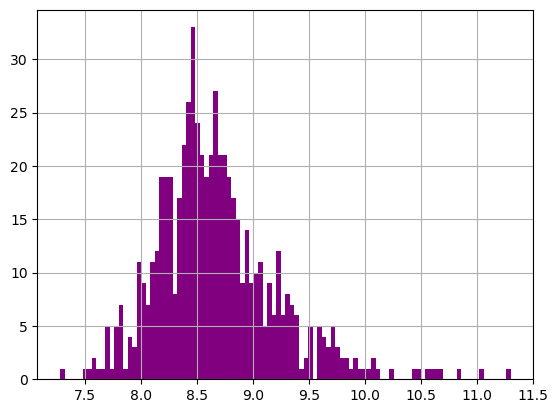

In [271]:
loan_train["Total_Income_log"].hist(bins=100, color="purple")
plt.show()

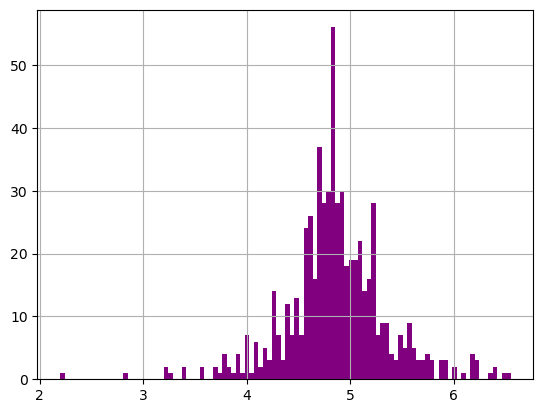

In [272]:
loan_train["Loan_Amount_log"].hist(bins=100, color="purple")
plt.show()

In [273]:
loan_train.shape

(614, 20)

In [274]:
loan_test.shape

(367, 13)

In [275]:
loan_train.dtypes

Dependents                  int32
ApplicantIncome             int64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term          float64
Credit_History            float64
Property_Area               int32
Loan_Status                 int32
Total Income              float64
Loan Status                 int64
Gender_Female               uint8
Gender_Male                 uint8
Married_No                  uint8
Married_Yes                 uint8
Education_Graduate          uint8
Education_Not Graduate      uint8
Self_Employed_No            uint8
Self_Employed_Yes           uint8
Loan_Amount_log           float64
Total_Income_log          float64
dtype: object

In [276]:
# Separate features and labels
features = ['Dependents','Total_Income_log','Loan_Amount_log','Loan_Amount_Term', 'Credit_History', 'Property_Area']
label = 'Loan Status'
X, y = loan_train[features].values, loan_train[label].values

In [277]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nValidation cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 429
Validation cases: 185


In [278]:
X, y = SMOTE().fit_resample(X, y)

In [279]:
#check the number of target variable after oversampling using SMOTE
from collections import Counter
print('Resample dataset shape', Counter(y))

Resample dataset shape Counter({1: 422, 0: 422})


In [280]:
# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


In [281]:
y_pred = model.predict(X_test)
print('Predicted labels: ', y_pred[:5])
print('Actual labels:    ' ,y_test[:5])

Predicted labels:  [1 1 1 1 1]
Actual labels:     [1 0 1 0 1]


In [282]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.827027027027027


Text(113.9222222222222, 0.5, 'Predicted')

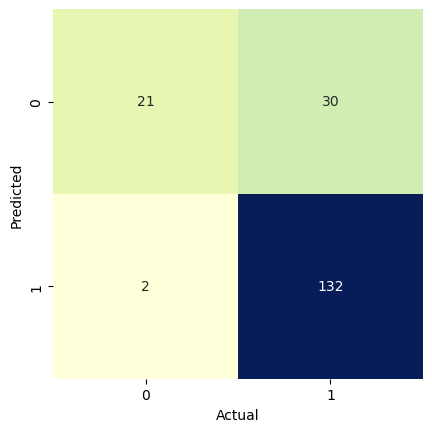

In [283]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [284]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



In [203]:
# retrieve the precision_score and recall_score metrics
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, y_pred))
print("Overall Recall:",recall_score(y_test, y_pred))

Overall Precision: 0.8148148148148148
Overall Recall: 0.9850746268656716


In [285]:
y_scores = model.predict_proba(X_test)
print(y_scores[:10])

[[0.2093225  0.7906775 ]
 [0.23997998 0.76002002]
 [0.29061515 0.70938485]
 [0.20945007 0.79054993]
 [0.16381631 0.83618369]
 [0.94910139 0.05089861]
 [0.1810255  0.8189745 ]
 [0.33249351 0.66750649]
 [0.94095436 0.05904564]
 [0.24696674 0.75303326]]


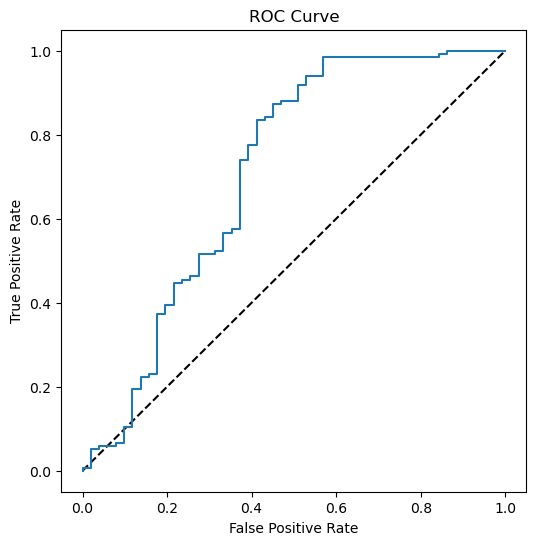

In [286]:
from sklearn.metrics import roc_curve
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [287]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.7105648229441031


In [288]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 1000)

# fit the pipeline to train a random forest model on the training set
model_RF = RF.fit(X_train, (y_train))
print (model_RF)

RandomForestClassifier(n_estimators=1000)


Confusion Matrix:
 [[ 25  26]
 [ 14 120]] 

Accuracy: 0.7837837837837838
Overall Precision: 0.821917808219178
Overall Recall: 0.8955223880597015

AUC: 0.7062481709101551


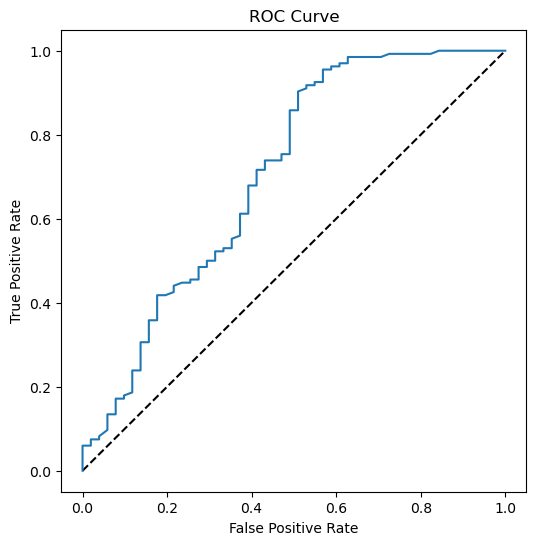

In [289]:
y_pred_RF = model_RF.predict(X_test)
y_scores_RF = model_RF.predict_proba(X_test)
cm = confusion_matrix(y_test,y_pred_RF)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, y_pred_RF))
print("Overall Precision:",precision_score(y_test, y_pred_RF))
print("Overall Recall:",recall_score(y_test, y_pred_RF))
auc = roc_auc_score(y_test,y_scores_RF[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_RF[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()